In [1]:

import numpy as np
import math
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
sensor_data=pd.read_csv('/content/sample_data/sensor_log.csv')
print(sensor_data.shape)

(43201, 22)


In [ ]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43201 entries, 0 to 43200
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      43201 non-null  object 
 1   ColdAisleTemp  43071 non-null  float64
 2   ColdAisleHum   43073 non-null  float64
 3   HotAisleTemp   43074 non-null  float64
 4   HotAisleHum    43074 non-null  float64
 5   Voltage_A      43088 non-null  float64
 6   Voltage_B      43089 non-null  float64
 7   Voltage_C      43089 non-null  float64
 8   Voltage(ab)    43089 non-null  float64
 9   Voltage(bc)    43089 non-null  float64
 10  Voltage(ca)    43089 non-null  float64
 11  Current(a)     43090 non-null  float64
 12  Current(b)     43090 non-null  float64
 13  Current(c)     43090 non-null  float64
 14  Power(a)       43201 non-null  float64
 15  Power(b)       43201 non-null  float64
 16  Power(c)       43201 non-null  float64
 17  TotalPower     43201 non-null  float64
 18  PAC1Te

In [ ]:
sensor_data

,Timestamp,ColdAisleTemp,ColdAisleHum,HotAisleTemp,HotAisleHum,Voltage_A,Voltage_B,Voltage_C,Voltage(ab),Voltage(bc),...,Current(b),Current(c),Power(a),Power(b),Power(c),TotalPower,PAC1Temp,PAC1Hum,PAC2Temp,PAC2Hum
0,2024-06-24 17:45:00,20.82,72.04,22.96,71.63,220.94,225.65,221.98,386.64,389.11,...,43.90,42.53,13.04,9.91,9.44,32.39,23.60,60.20,22.60,66.6
1,2024-06-24 17:46:00,20.46,70.92,22.91,71.43,221.15,225.24,222.39,386.50,388.57,...,43.31,41.21,13.12,9.76,9.16,32.04,23.30,58.10,22.60,63.5
2,2024-06-24 17:47:00,19.74,70.00,22.81,71.07,221.32,225.34,222.93,386.81,389.59,...,52.44,41.47,13.09,11.82,9.24,34.16,22.85,56.60,22.60,60.9
3,2024-06-24 17:48:00,19.03,69.90,22.65,68.57,221.55,225.38,221.98,386.84,388.91,...,61.91,64.44,13.03,13.95,14.30,41.29,22.40,56.10,22.60,58.2
4,2024-06-24 17:49:00,18.62,70.31,22.55,69.59,221.55,225.51,222.05,386.64,389.38,...,62.55,67.28,13.11,14.11,14.94,42.15,22.40,55.10,22.60,57.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43196,2024-07-24 17:41:00,18.11,83.83,20.94,71.22,229.19,232.53,230.40,400.02,401.68,...,28.58,29.45,7.32,6.65,6.79,20.75,20.60,63.10,21.65,60.6
43197,2024-07-24 17:42:00,18.11,88.16,20.92,78.78,229.72,233.00,230.50,400.89,402.15,...,28.72,44.16,7.37,6.69,10.18,24.24,20.60,68.60,21.50,70.1
43198,2024-07-24 17:43:00,18.11,88.27,20.92,80.92,230.13,233.00,230.77,401.37,402.42,...,28.03,44.02,7.28,6.53,10.16,23.97,20.60,71.00,21.60,73.7
43199,2024-07-24 17:44:00,18.32,88.27,20.94,81.43,230.37,232.87,231.27,401.88,402.53,...,36.07,30.06,7.30,8.40,6.95,22.65,20.60,75.15,21.75,76.7


In [ ]:
sensor_data.head(10)

,Timestamp,ColdAisleTemp,ColdAisleHum,HotAisleTemp,HotAisleHum,Voltage_A,Voltage_B,Voltage_C,Voltage(ab),Voltage(bc),...,Current(b),Current(c),Power(a),Power(b),Power(c),TotalPower,PAC1Temp,PAC1Hum,PAC2Temp,PAC2Hum
0,2024-06-24 17:45:00,20.82,72.04,22.96,71.63,220.94,225.65,221.98,386.64,389.11,...,43.90,42.53,13.04,9.91,9.44,32.39,23.60,60.20,22.60,66.6
1,2024-06-24 17:46:00,20.46,70.92,22.91,71.43,221.15,225.24,222.39,386.50,388.57,...,43.31,41.21,13.12,9.76,9.16,32.04,23.30,58.10,22.60,63.5
2,2024-06-24 17:47:00,19.74,70.00,22.81,71.07,221.32,225.34,222.93,386.81,389.59,...,52.44,41.47,13.09,11.82,9.24,34.16,22.85,56.60,22.60,60.9
3,2024-06-24 17:48:00,19.03,69.90,22.65,68.57,221.55,225.38,221.98,386.84,388.91,...,61.91,64.44,13.03,13.95,14.30,41.29,22.40,56.10,22.60,58.2
4,2024-06-24 17:49:00,18.62,70.31,22.55,69.59,221.55,225.51,222.05,386.64,389.38,...,62.55,67.28,13.11,14.11,14.94,42.15,22.40,55.10,22.60,57.2
5,2024-06-24 17:50:00,18.16,80.00,22.24,65.61,222.06,225.75,221.71,387.35,389.42,...,46.48,55.70,7.15,10.49,12.35,29.99,21.95,57.35,22.55,55.7
6,2024-06-24 17:51:00,18.11,88.37,22.14,71.02,221.82,226.19,222.93,387.58,390.46,...,28.72,29.49,7.16,6.50,6.57,20.24,21.80,68.00,22.50,59.7
7,2024-06-24 17:52:00,18.32,88.37,22.04,73.06,221.96,226.05,222.93,387.85,390.26,...,29.29,29.37,7.24,6.62,6.55,20.41,21.80,71.20,22.50,63.3
8,2024-06-24 17:53:00,18.78,88.37,22.14,73.72,221.82,225.92,222.69,387.62,389.89,...,28.58,28.95,7.10,6.46,6.45,20.00,21.95,74.80,22.50,67.6
9,2024-06-24 17:54:00,19.23,88.37,22.24,73.78,224.25,227.87,224.62,391.30,393.23,...,28.28,49.21,7.14,6.44,11.05,24.64,22.10,75.30,22.50,70.6


In [ ]:
sensor_data = sensor_data.drop(columns = ['Timestamp'])

In [ ]:
#now first of all find out co-relation with help of Seaborn's heatmap() function:
sensor_data.corr()   #personal correlation coefficient:

,ColdAisleTemp,ColdAisleHum,HotAisleTemp,HotAisleHum,Voltage_A,Voltage_B,Voltage_C,Voltage(ab),Voltage(bc),Voltage(ca),...,Current(b),Current(c),Power(a),Power(b),Power(c),TotalPower,PAC1Temp,PAC1Hum,PAC2Temp,PAC2Hum
ColdAisleTemp,1.000000,-0.049041,0.564056,0.040403,-0.014106,-0.013178,-0.006371,-0.013739,-0.010522,-0.009408,...,0.213146,0.174721,0.244041,0.217561,0.181143,0.248423,-0.003892,-0.003892,-0.002108,-0.002107
ColdAisleHum,-0.049041,1.000000,-0.095606,0.342398,0.016583,0.008108,0.003399,0.010168,0.007048,0.010646,...,-0.577094,-0.432229,-0.709416,-0.583073,-0.441214,-0.670912,-0.009441,-0.009426,-0.009925,-0.009917
HotAisleTemp,0.564056,-0.095606,1.000000,-0.470800,-0.249516,-0.238225,-0.244620,-0.245599,-0.238984,-0.248553,...,0.245612,0.269574,0.267577,0.217809,0.242865,0.283270,-0.008402,-0.008405,-0.013679,-0.013680
HotAisleHum,0.040403,0.342398,-0.470800,1.000000,0.254690,0.242843,0.256112,0.249683,0.245630,0.259111,...,-0.262650,-0.300358,-0.259399,-0.231979,-0.269900,-0.295611,-0.003763,-0.003756,0.005190,0.005195
Voltage_A,-0.014106,0.016583,-0.249516,0.254690,1.000000,0.995214,0.995052,0.998946,0.996635,0.997718,...,-0.012860,-0.041238,0.046482,0.061653,0.039445,0.056166,-0.003615,-0.003614,-0.001848,-0.001847
Voltage_B,-0.013178,0.008108,-0.238225,0.242843,0.995214,1.000000,0.992529,0.998112,0.999055,0.993596,...,-0.008106,-0.029153,0.065462,0.063725,0.048209,0.068309,-0.002792,-0.002791,-0.000353,-0.000352
Voltage_C,-0.006371,0.003399,-0.244620,0.256112,0.995052,0.992529,1.000000,0.995313,0.996387,0.999057,...,-0.006619,-0.065922,0.062462,0.069814,0.017466,0.056681,-0.002882,-0.002882,-0.001300,-0.001299
Voltage(ab),-0.013739,0.010168,-0.245599,0.249683,0.998946,0.998112,0.995313,1.000000,0.998573,0.996906,...,-0.006847,-0.039820,0.058637,0.066463,0.039431,0.062846,-0.003213,-0.003213,-0.001222,-0.001222
Voltage(bc),-0.010522,0.007048,-0.238984,0.245630,0.996635,0.999055,0.996387,0.998573,1.000000,0.996703,...,-0.005333,-0.040154,0.063772,0.067929,0.039086,0.065338,-0.002602,-0.002601,-0.000534,-0.000534
Voltage(ca),-0.009408,0.010646,-0.248553,0.259111,0.997718,0.993596,0.999057,0.996906,0.996703,1.000000,...,-0.015198,-0.057107,0.052408,0.061277,0.026140,0.053121,-0.003403,-0.003402,-0.001702,-0.001702


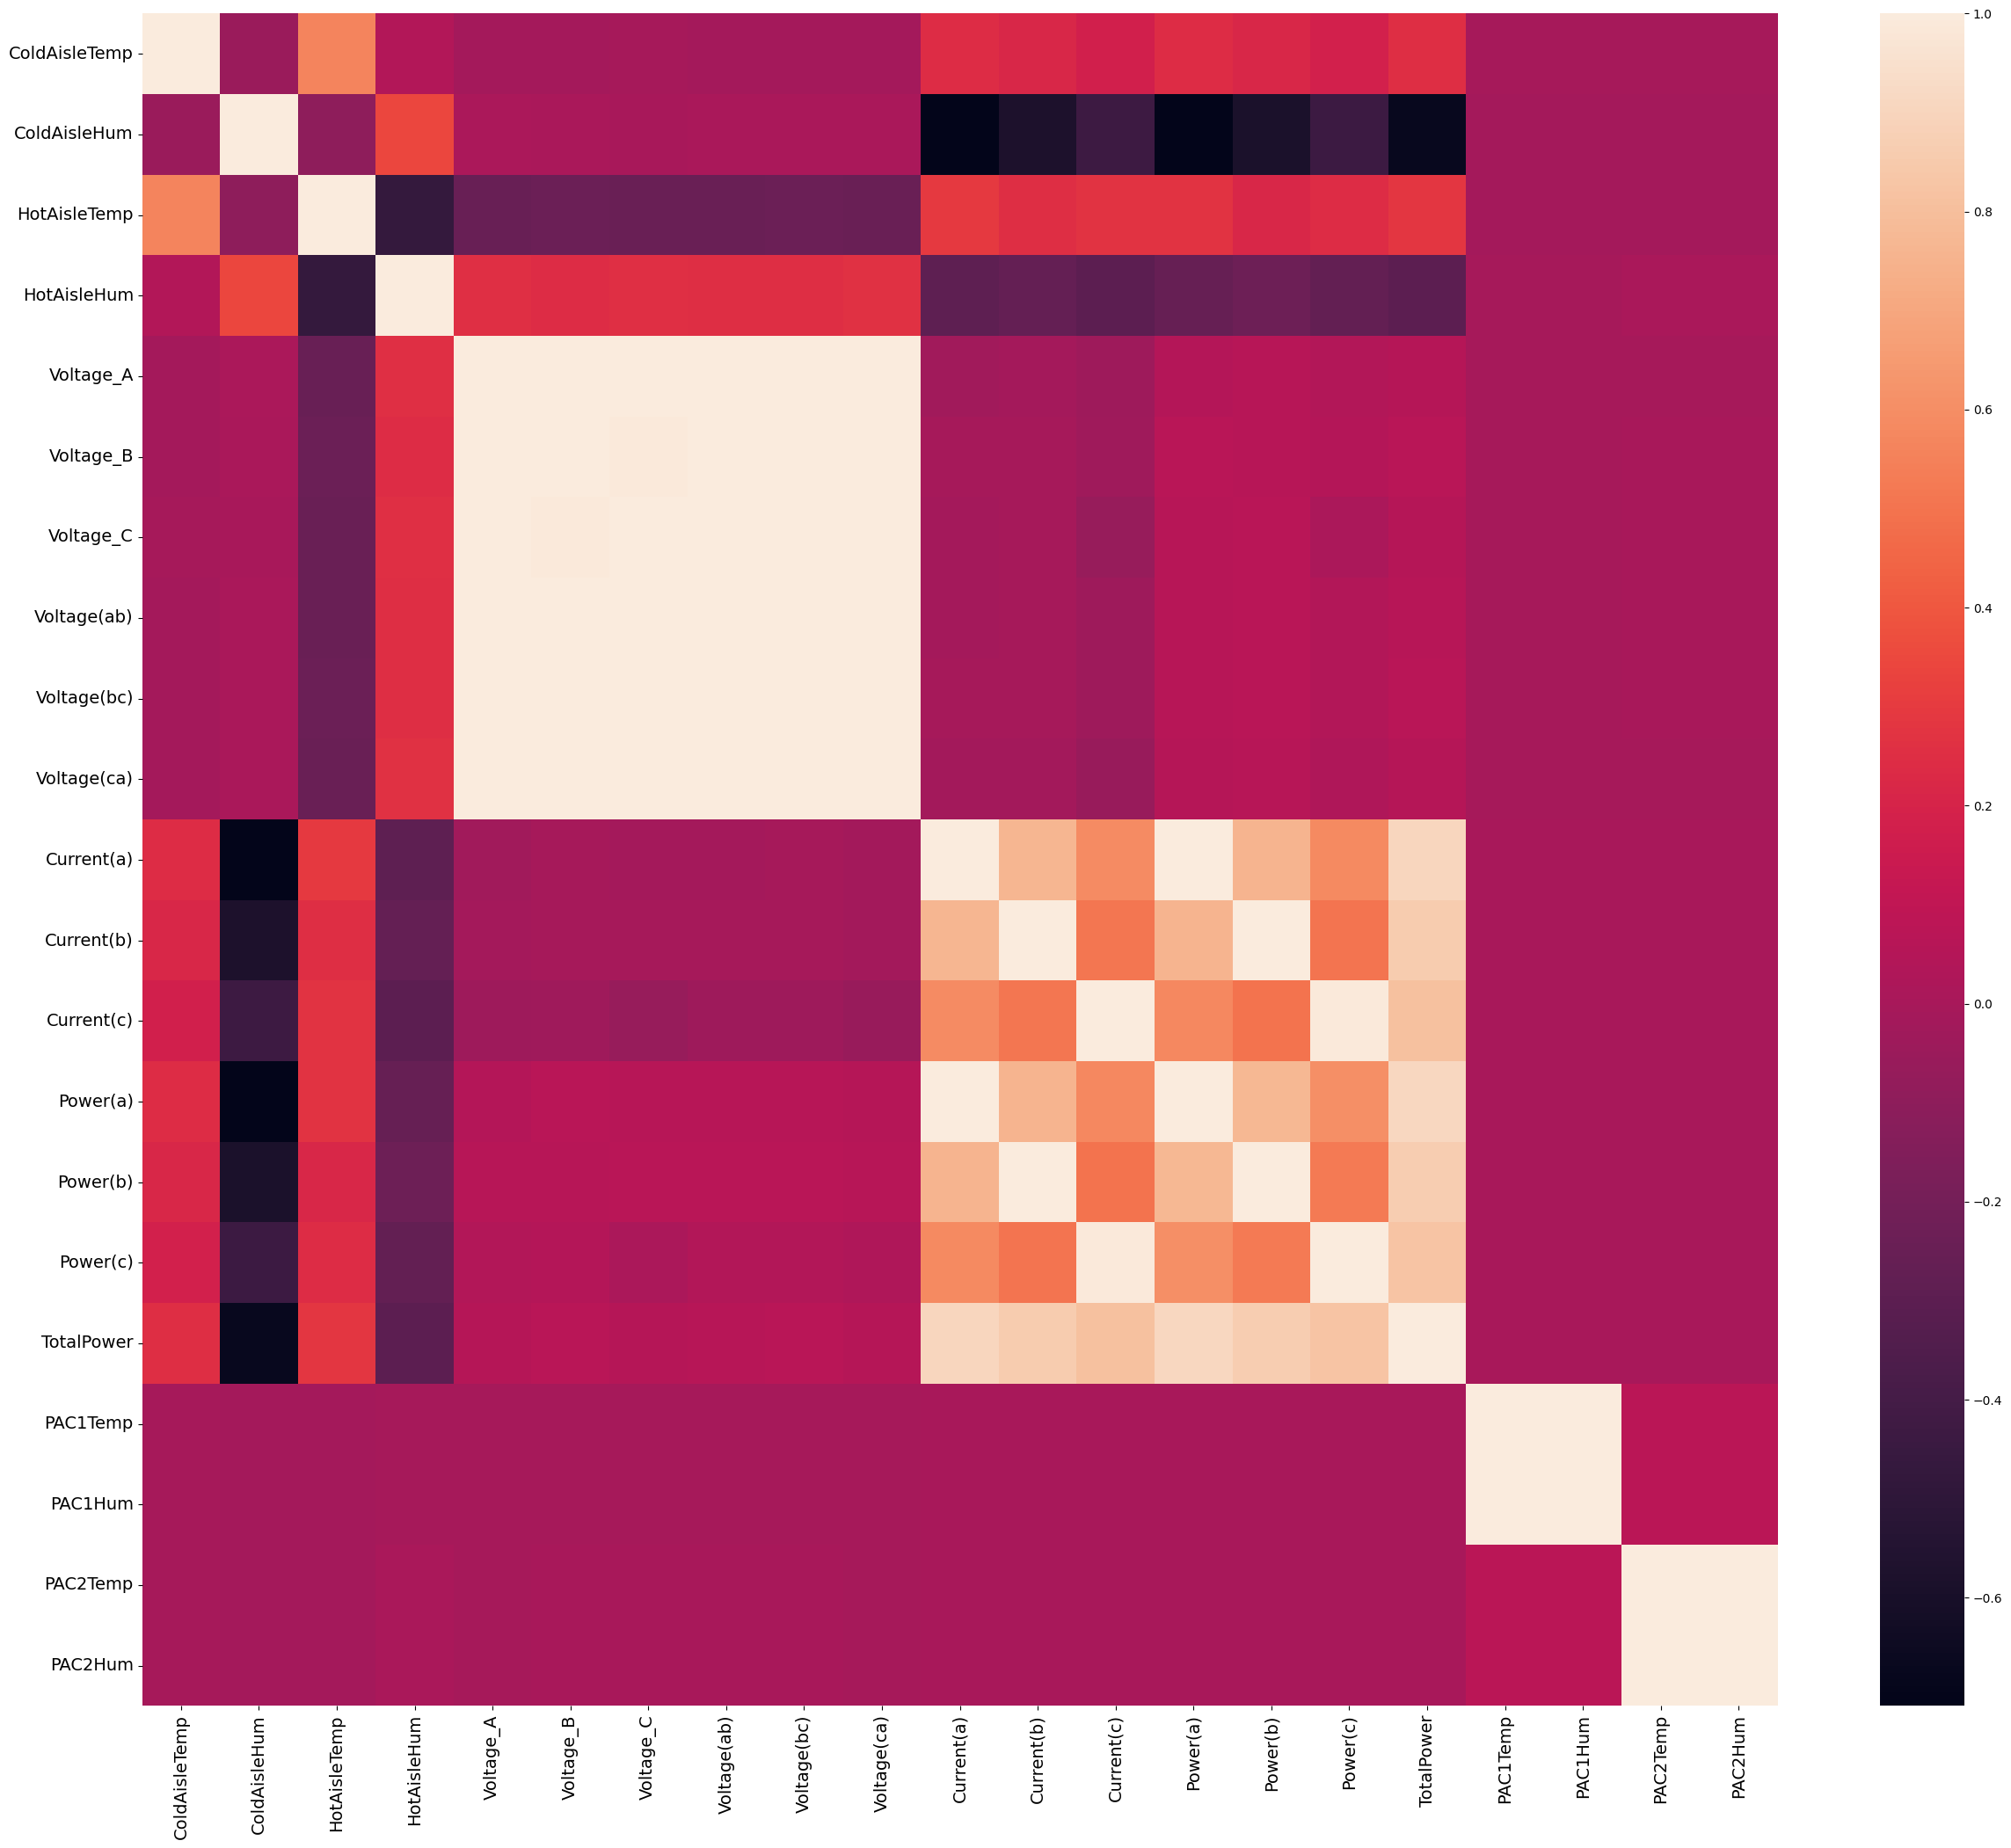

In [ ]:
plt.figure(figsize = (30,25))
sns.heatmap(sensor_data.corr())
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
#Now we can choose different columns according to strong or weak relation between our depemdent and independent columns;

#To remove unnecessary columns;
final = sensor_data.drop(columns = ['Voltage_A', 'Voltage_B', 'Voltage_C', 'Voltage(ab)', 'Voltage(bc)', 'Voltage(ca)'])
final

,ColdAisleTemp,ColdAisleHum,HotAisleTemp,HotAisleHum,Current(a),Current(b),Current(c),Power(a),Power(b),Power(c),TotalPower,PAC1Temp,PAC1Hum,PAC2Temp,PAC2Hum
0,20.82,72.04,22.96,71.63,59.02,43.90,42.53,13.04,9.91,9.44,32.39,23.60,60.20,22.60,66.6
1,20.46,70.92,22.91,71.43,59.33,43.31,41.21,13.12,9.76,9.16,32.04,23.30,58.10,22.60,63.5
2,19.74,70.00,22.81,71.07,59.16,52.44,41.47,13.09,11.82,9.24,34.16,22.85,56.60,22.60,60.9
3,19.03,69.90,22.65,68.57,58.82,61.91,64.44,13.03,13.95,14.30,41.29,22.40,56.10,22.60,58.2
4,18.62,70.31,22.55,69.59,59.16,62.55,67.28,13.11,14.11,14.94,42.15,22.40,55.10,22.60,57.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43196,18.11,83.83,20.94,71.22,31.92,28.58,29.45,7.32,6.65,6.79,20.75,20.60,63.10,21.65,60.6
43197,18.11,88.16,20.92,78.78,32.10,28.72,44.16,7.37,6.69,10.18,24.24,20.60,68.60,21.50,70.1
43198,18.11,88.27,20.92,80.92,31.62,28.03,44.02,7.28,6.53,10.16,23.97,20.60,71.00,21.60,73.7
43199,18.32,88.27,20.94,81.43,31.68,36.07,30.06,7.30,8.40,6.95,22.65,20.60,75.15,21.75,76.7


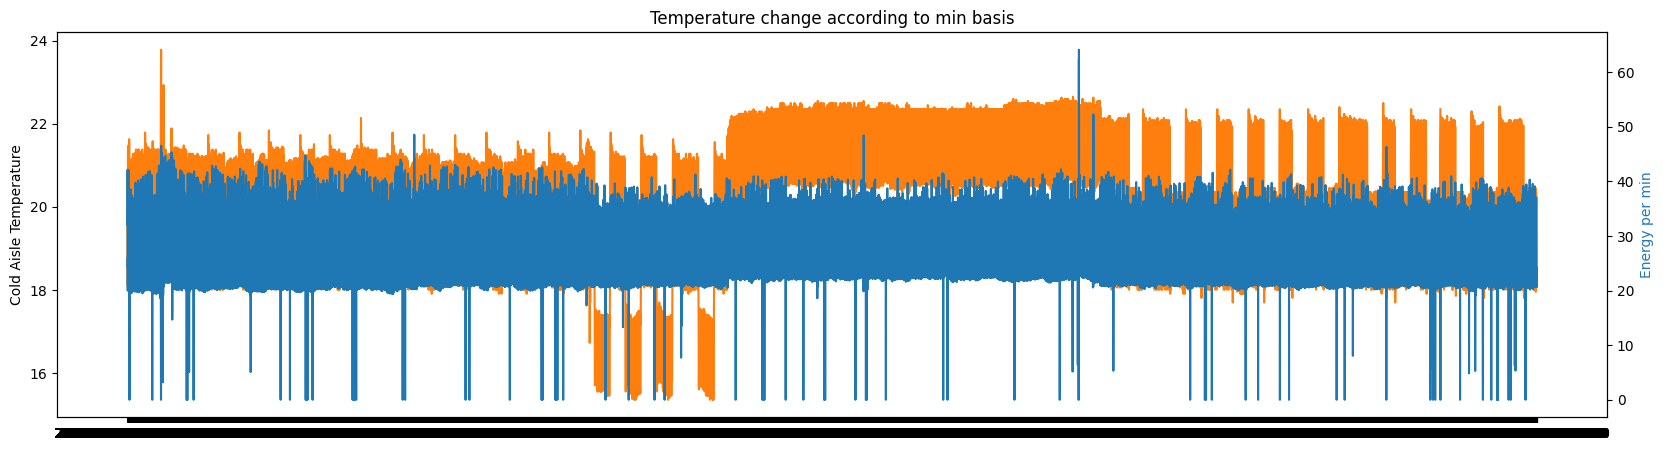

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(sensor_data.Timestamp, sensor_data.ColdAisleTemp, color = 'tab:orange')

ax1.set_ylabel('Cold Aisle Temperature')

ax2 = ax1.twinx()
ax2.plot(sensor_data.Timestamp,sensor_data.TotalPower,color = 'tab:blue')
ax2.set_ylabel('Energy per min',color = 'tab:blue')

plt.title('Temperature change according to min basis')

plt.show()

In [ ]:
#Setting the value for X and Y
x = final.drop('TotalPower', axis = 'columns')
y = final['TotalPower']

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [ ]:
#removing missing values
x_train = x_train.dropna()
y_train = y_train[x_train.index]  # Ensure y_train matches the filtered x_train


In [ ]:
#Fitting the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -0.0014029886801978364
Coefficients:


[('ColdAisleTemp', -1.1960602484339274e-05),
 ('ColdAisleHum', -2.442619250321663e-07),
 ('HotAisleTemp', 1.3152610998948253e-05),
 ('HotAisleHum', 1.7423718309685992e-05),
 ('Current(a)', -0.00013411688890722985),
 ('Current(b)', 0.00027823057995077536),
 ('Current(c)', -4.5923682730259324e-05),
 ('Power(a)', 1.0005425896840336),
 ('Power(b)', 0.9988846103854662),
 ('Power(c)', 1.000184067367536),
 ('PAC1Temp', 2.0453800155432556e-06),
 ('PAC1Hum', -2.0453821141153448e-06),
 ('PAC2Temp', 5.585397090560149e-07),
 ('PAC2Hum', -5.585188151769401e-07)]

In [ ]:
#removing missing values
x_test = x_test.dropna()
y_test = y_test[x_test.index]  # Ensure y_train matches the filtered x_train

In [ ]:
#Prediction of test set
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [21.21987935 26.54013785 22.17016408 ... 38.00009104 32.38992612
 21.34994046]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
18020,21.22,21.219879
5135,26.55,26.540138
8204,22.17,22.170164
27379,33.11,33.109904
1162,21.66,21.659849


In [ ]:
#removing missing values
x = x.dropna()
y = y[x.index]

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 100.00
Mean Absolute Error: 0.0033919554074696772
Mean Square Error: 3.3348446773436165e-05
Root Mean Square Error: 0.005774811405876054


In [ ]:
#Now we need to check our model accuracy is correct or not, second thing to check our model is overfit or underfit.
#Then we can use "Validation"
#Method: K-Fold cross Validation

from sklearn.model_selection import KFold
model = LinearRegression()
kfold_validation = KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(model, x, y, cv = kfold_validation)

In [ ]:
print(result*100)
print(np.mean(result*100))

[99.99992345 99.99991766 99.99990485 99.99988487 99.99988343 99.9998839
 99.99990108 99.9998931  99.99989771 99.99988981]
99.9998979858703


In [ ]:
#Training score by cross validation, here I take number of K-Fold is 25 for training:
train_scores = cross_val_score(model, x_train, y_train , cv = 25)
train_scores*100

array([99.99990149, 99.99990103, 99.99990947, 99.9999069 , 99.99989951,
       99.99990096, 99.99990741, 99.99990071, 99.9998998 , 99.99990391,
       99.99990197, 99.99990425, 99.99990528, 99.99989628, 99.99989889,
       99.99989282, 99.99989451, 99.99989923, 99.99989965, 99.99989055,
       99.99990485, 99.999894  , 99.99989717, 99.99990462, 99.99989435])

In [ ]:
#Testing score by cross validation, here I take number of K-Fold is 25 for testing:
test_scores = cross_val_score(model, x_test, y_test , cv = 25)
test_scores*100

array([   99.99988188,    99.99989594,    99.999902  ,    99.99989838,
          99.99990605,    99.99989091,    99.99988794,    99.99988707,
          99.99991166,    99.99990065,    99.99990984,    99.99990052,
          99.9999066 ,    99.99990123,    99.99988556,    99.99991794,
          99.99990459,    99.99989054,    99.99989636, -7878.83753658,
          99.99990561,    99.99991952,    99.99992083,    99.99988843,
          99.9998986 ])

In [ ]:
#Mean of trining score:
print(np.mean(train_scores*100))

99.99990038521453


In [ ]:
#Mean of testing score:
print(np.mean(test_scores*100))

-219.15359711772825


DECISION TREE REGRESSION.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 10, min_samples_split = 10,
                                 random_state = 100)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=100)

In [ ]:
#Prediction of test set
y_pred_regressor=regressor.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_regressor))

Prediction for test set: [21.20115108 27.33041667 22.21693878 ... 38.08       32.05758993
 21.37104651]


In [ ]:
#Actual value and the predicted value
regressor_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_regressor})
regressor_diff.head()

,Actual value,Predicted value
18020,21.22,21.201151
5135,26.55,27.330417
8204,22.17,22.216939
27379,33.11,32.941860
1162,21.66,21.371047


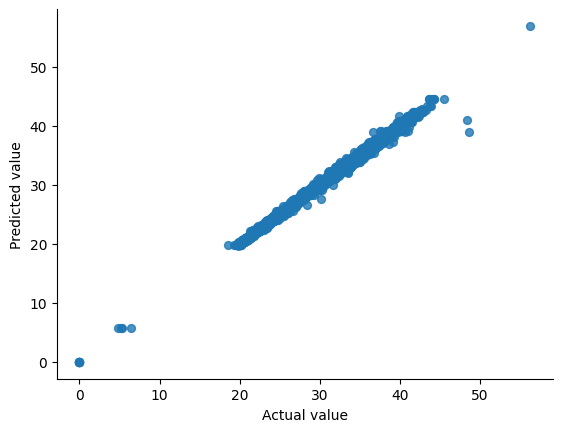

In [ ]:
# @title Actual value vs Predicted value

from matplotlib import pyplot as plt
regressor_diff.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

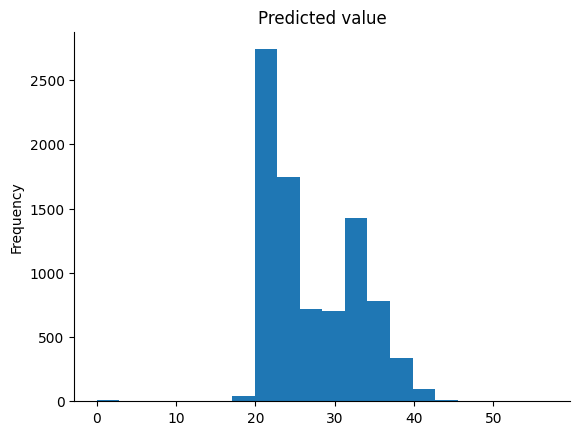

In [ ]:
# @title Predicted value

from matplotlib import pyplot as plt
regressor_diff['Predicted value'].plot(kind='hist', bins=20, title='Predicted value')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_regressor)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_regressor)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_regressor))
print('R squared: {:.2f}'.format(regressor.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.84
Mean Absolute Error: 0.17395516125297136
Mean Square Error: 0.08034282703322063
Root Mean Square Error: 0.28344810289225897


RANDOM FOREST REGRESSION


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 100)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=100)

In [ ]:
#Prediction of test set
y_pred_regressor=regressor.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_regressor))

Prediction for test set: [21.219  26.934  22.2035 ... 37.834  32.4065 21.343 ]


In [ ]:
#Actual value and the predicted value
regressor_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_regressor})
regressor_diff.head()

,Actual value,Predicted value
18020,21.22,21.2190
5135,26.55,26.9340
8204,22.17,22.2035
27379,33.11,33.0665
1162,21.66,21.6325


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_regressor)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_regressor)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_regressor))
print('R squared: {:.2f}'.format(regressor.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.98
Mean Absolute Error: 0.04926857010213556
Mean Square Error: 0.021048767003249758
Root Mean Square Error: 0.14508193203583195


Data Visualizations

<ipython-input-81-ace721da91dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sensor_data["TotalPower"])


Text(0.5, 1.0, 'Power Distribution')

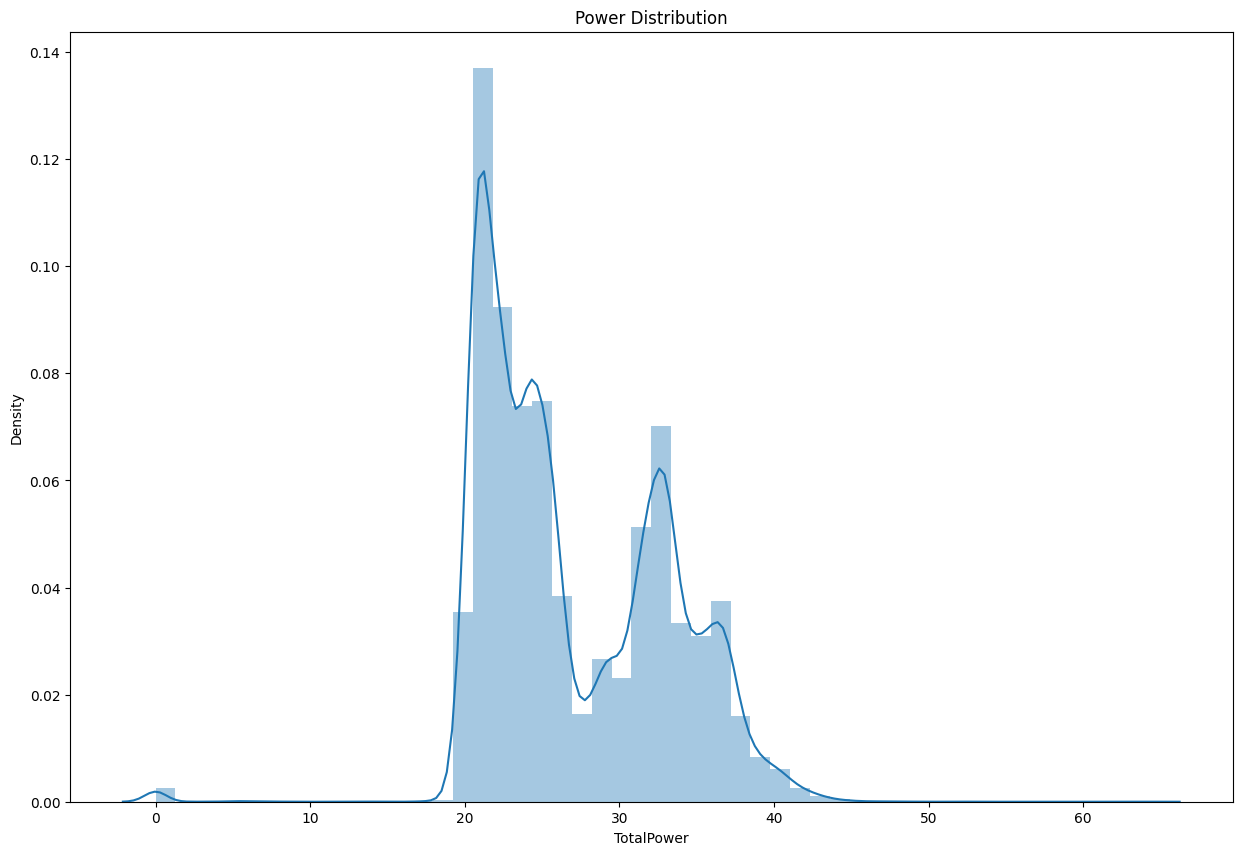

In [ ]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(sensor_data["TotalPower"])
plt.title("Power Distribution")

In [ ]:
sensor_data=pd.read_csv('/content/sample_data/sensor_log.csv')
print(sensor_data.shape)

(43201, 22)


In [ ]:
dataset = sensor_data
dataset["Month"] = pd.to_datetime(sensor_data["Timestamp"]).dt.month
dataset["Year"] = pd.to_datetime(sensor_data["Timestamp"]).dt.year
dataset["Date"] = pd.to_datetime(sensor_data["Timestamp"]).dt.date
dataset["Time"] = pd.to_datetime(sensor_data["Timestamp"]).dt.time
dataset = sensor_data.set_index("Timestamp")
dataset.index = pd.to_datetime(dataset.index)

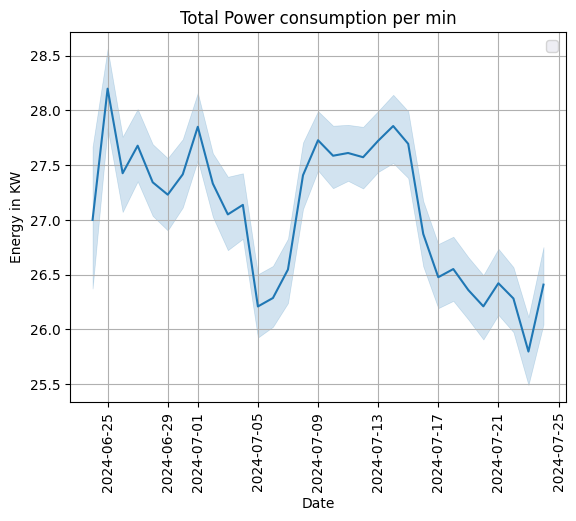

In [ ]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Date"], y= dataset["TotalPower"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Total Power consumption per min")
plt.xlabel("Date")
plt.ylabel("Energy in KW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)


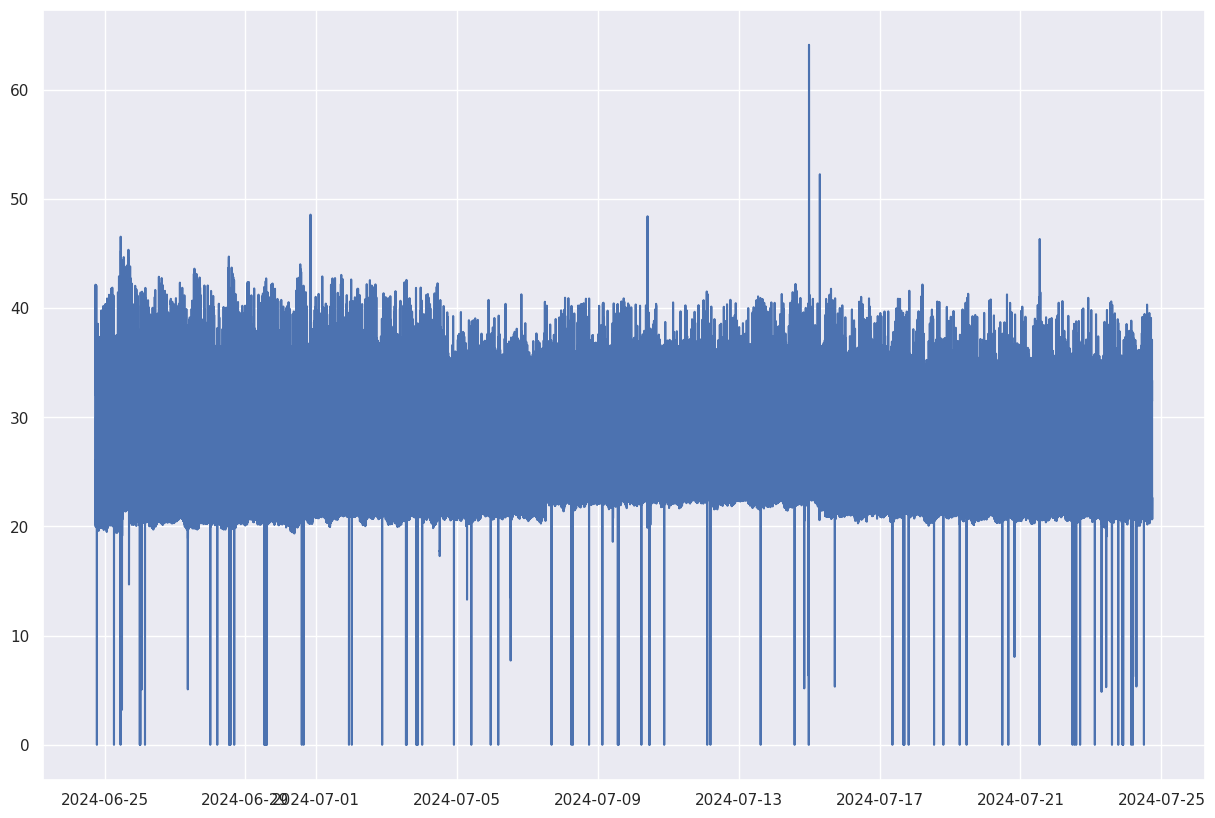

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(dataset["TotalPower"])

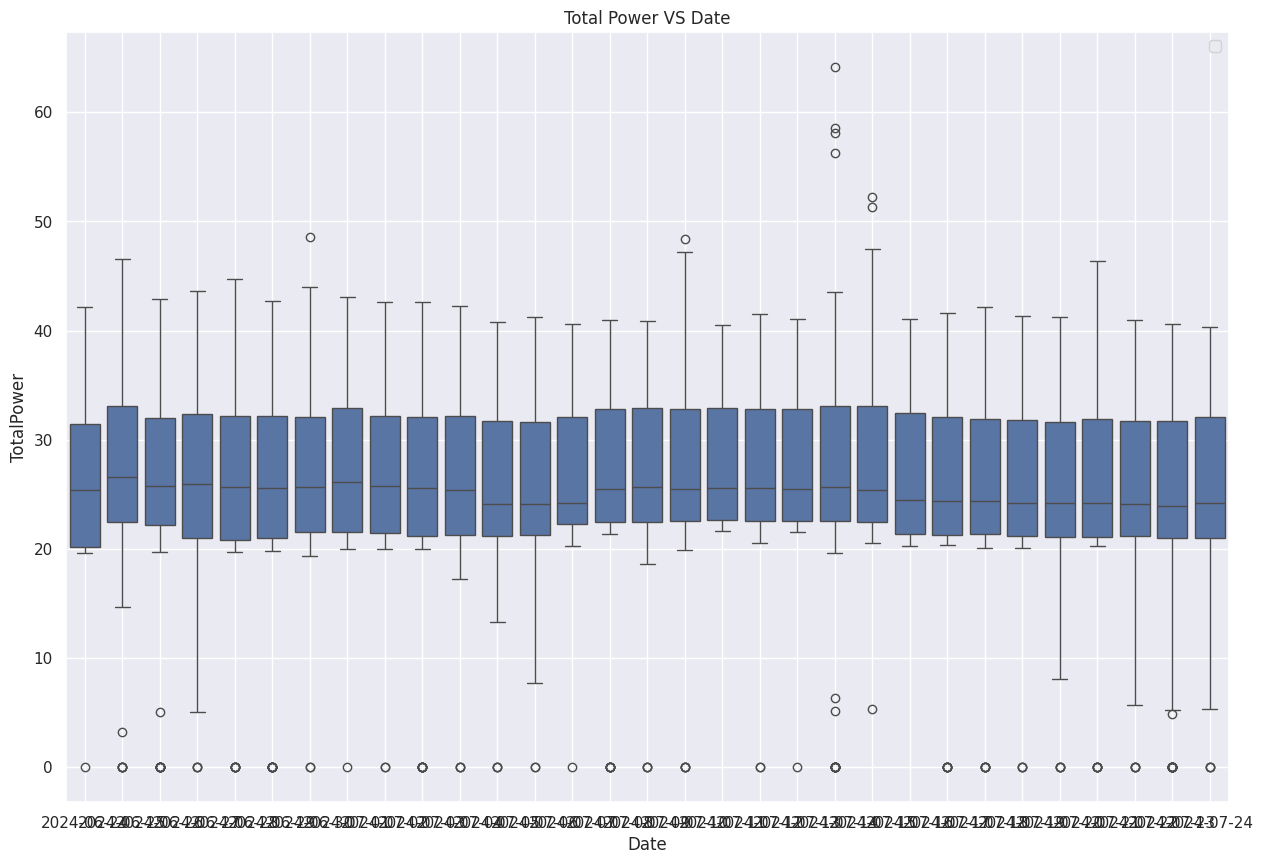

In [ ]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["Date"], y=dataset["TotalPower"], data= dataset)
plt.title("Total Power VS Date")
plt.xlabel("Date")
plt.grid(True, alpha=1)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)

NameError: name 'ax1' is not defined

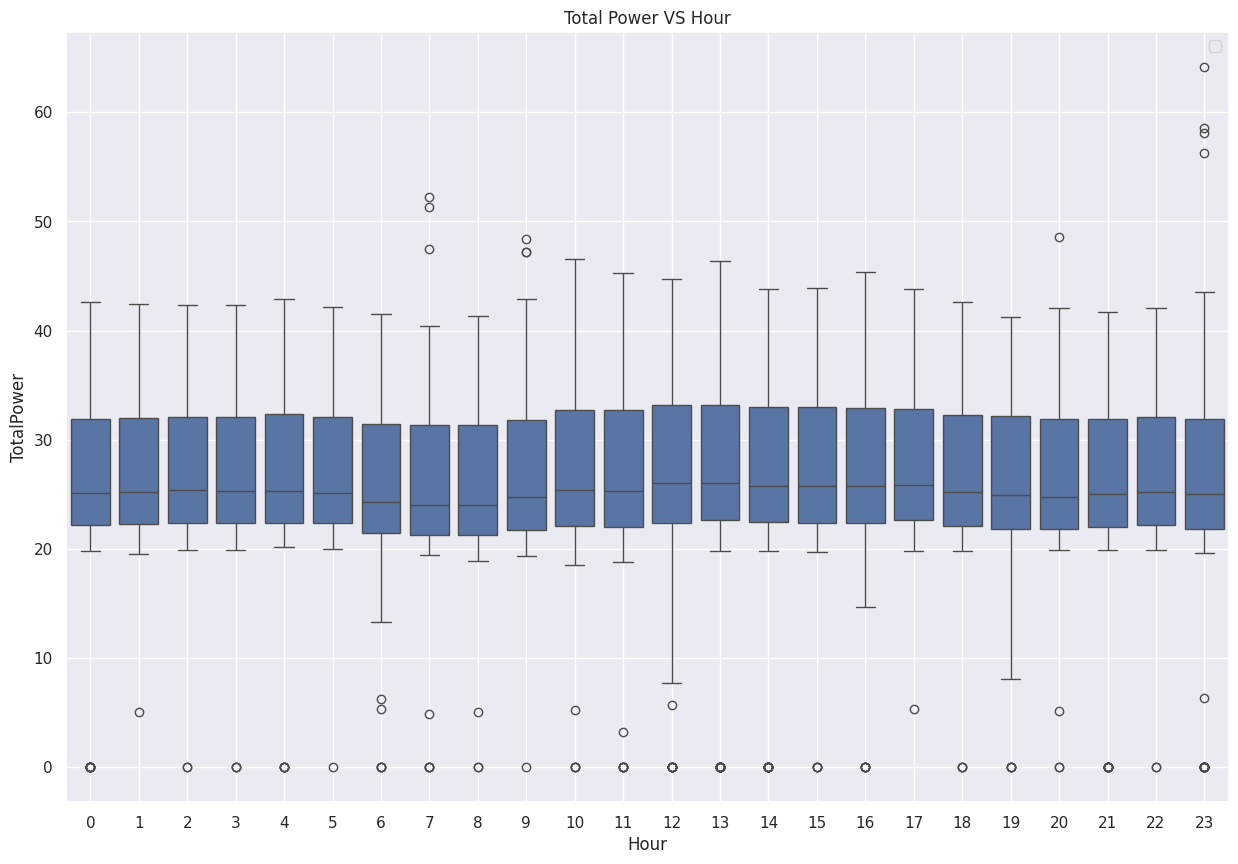

In [ ]:

dataset1 = dataset
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset1.index.hour, y=dataset1.TotalPower, data= dataset)
plt.title("Total Power VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

LSTM Model
Train, Validation and Test Dataset

In [ ]:
y = dataset["TotalPower"]
print(y[0])
y.shape

32.39


<ipython-input-14-9c46aca3ee1e>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[0])


(43201,)

In [ ]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1))
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])

Normalizing data before model fitting
[[0.50506783]
 [0.49961017]
 [0.53266802]
 [0.64384843]
 [0.65725869]
 [0.46764385]
 [0.31560892]
 [0.31825978]
 [0.31186652]
 [0.38421955]]


In [ ]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]


In [ ]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

In [ ]:
# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)

X_train shape:  (27547, 100, 1)
X_test shape:  (8540, 100, 1)
X_val shape:  (6811, 100, 1)


Model Structure

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [ ]:
# @title Default title text
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 20 ,batch_size = 20)


Epoch 1/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 280s 198ms/step - loss: 0.0093 - val_loss: 0.0045
Epoch 2/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 325s 200ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 3/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 314s 195ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 4/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 330s 201ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 319s 198ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 6/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 329s 203ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 7/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 319s 202ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 8/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 315s 197ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 330s 203ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 10/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 311s 195ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 11/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 331s 202ms/step - loss: 0.0029 - val

Model Evaluating

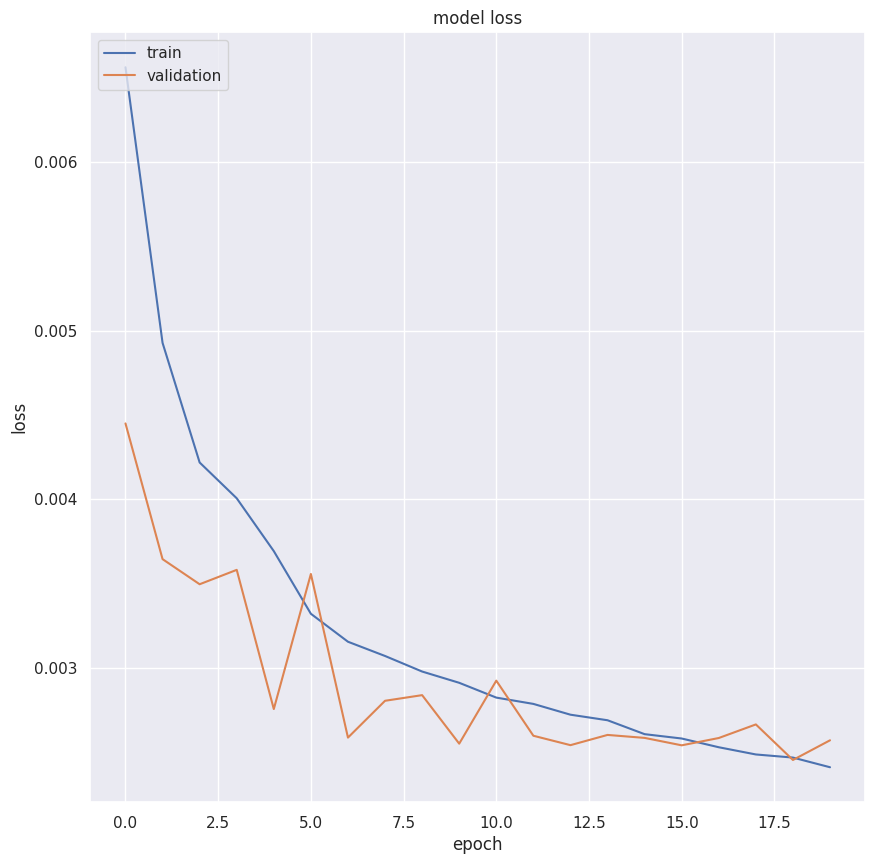

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)

861/861 ━━━━━━━━━━━━━━━━━━━━ 63s 71ms/step
267/267 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

27.362371120459848

In [ ]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

(27547, 1)
(8540, 1)
(6811, 1)
[33.848083]
(27547,)


Conclusion

In [ ]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

861/861 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step


,Train Predictions,Actuals
0,[33.84808349609375],[35.85]
1,[33.70835876464844],[38.57]
2,[25.03493309020996],[19.94]
3,[21.405441284179688],[19.92]
4,[21.343469619750977],[19.75]
...,...,...
27542,[23.307842254638672],[25.04]
27543,[24.37102508544922],[25.35]
27544,[23.744915008544922],[23.85]
27545,[22.808109283447266],[22.31]


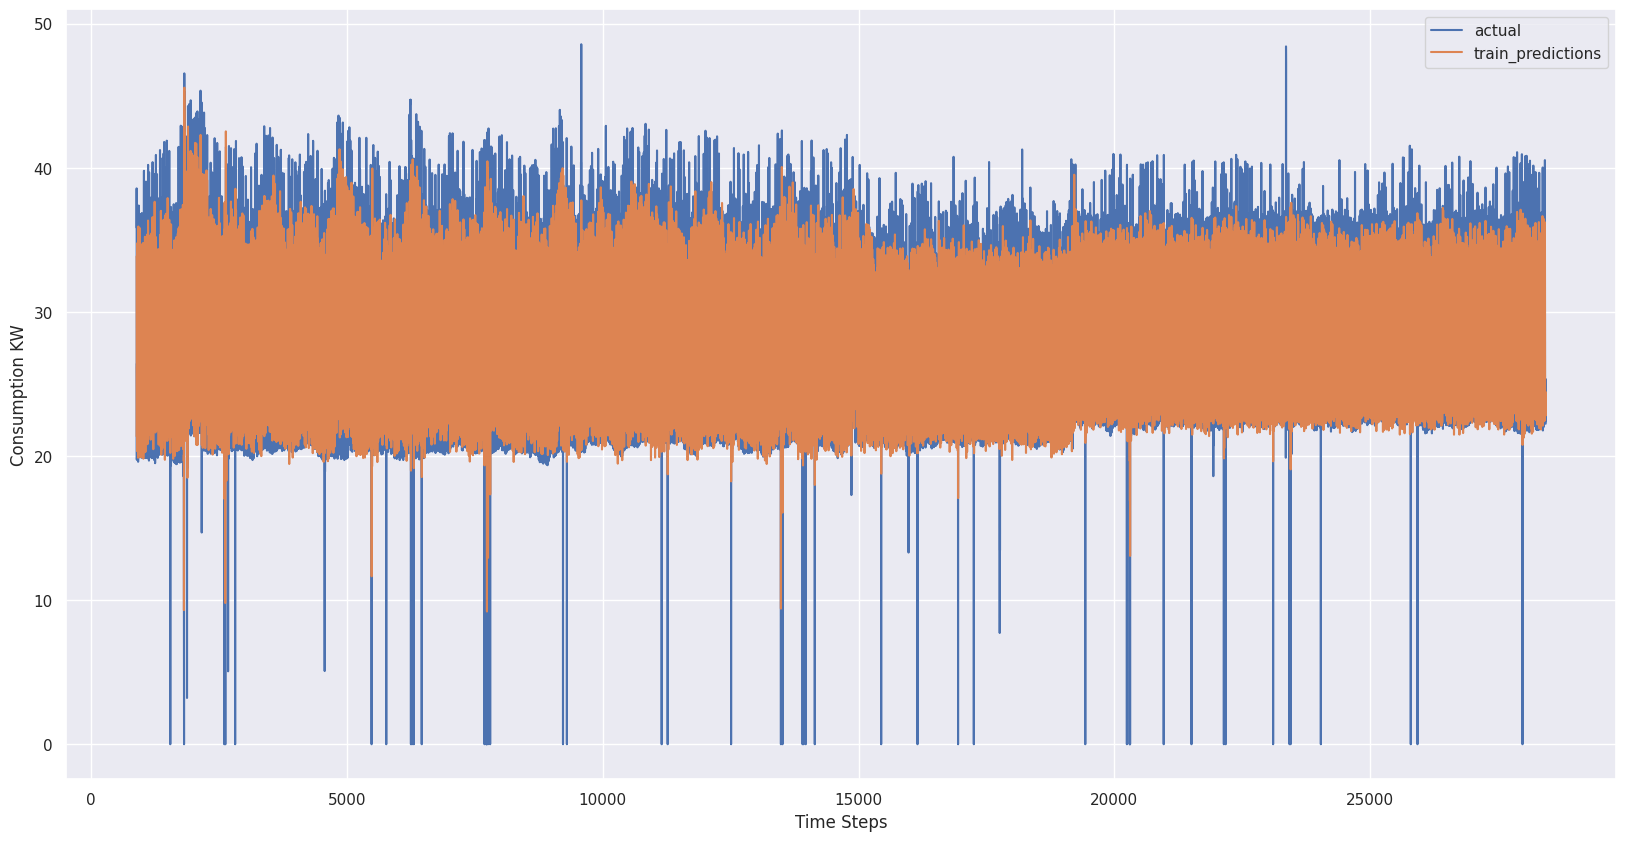

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:887+actual.shape[0], :] = actual

plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:887+train_predictions.shape[0], :] = train_predictions

plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption KW')
plt.show()

In [ ]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

213/213 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step


,Val Predictions,Actuals_val
0,[27.416000366210938],[22.47]
1,[22.038949966430664],[22.21]
2,[23.86530113220215],[22.2]
3,[23.77280044555664],[24.61]
4,[24.505918502807617],[25.62]
...,...,...
6806,[22.039779663085938],[24.28]
6807,[25.320220947265625],[24.39]
6808,[30.564884185791016],[35.26]
6809,[34.27239990234375],[37.24]


Text(0, 0.5, 'Consumption KW')

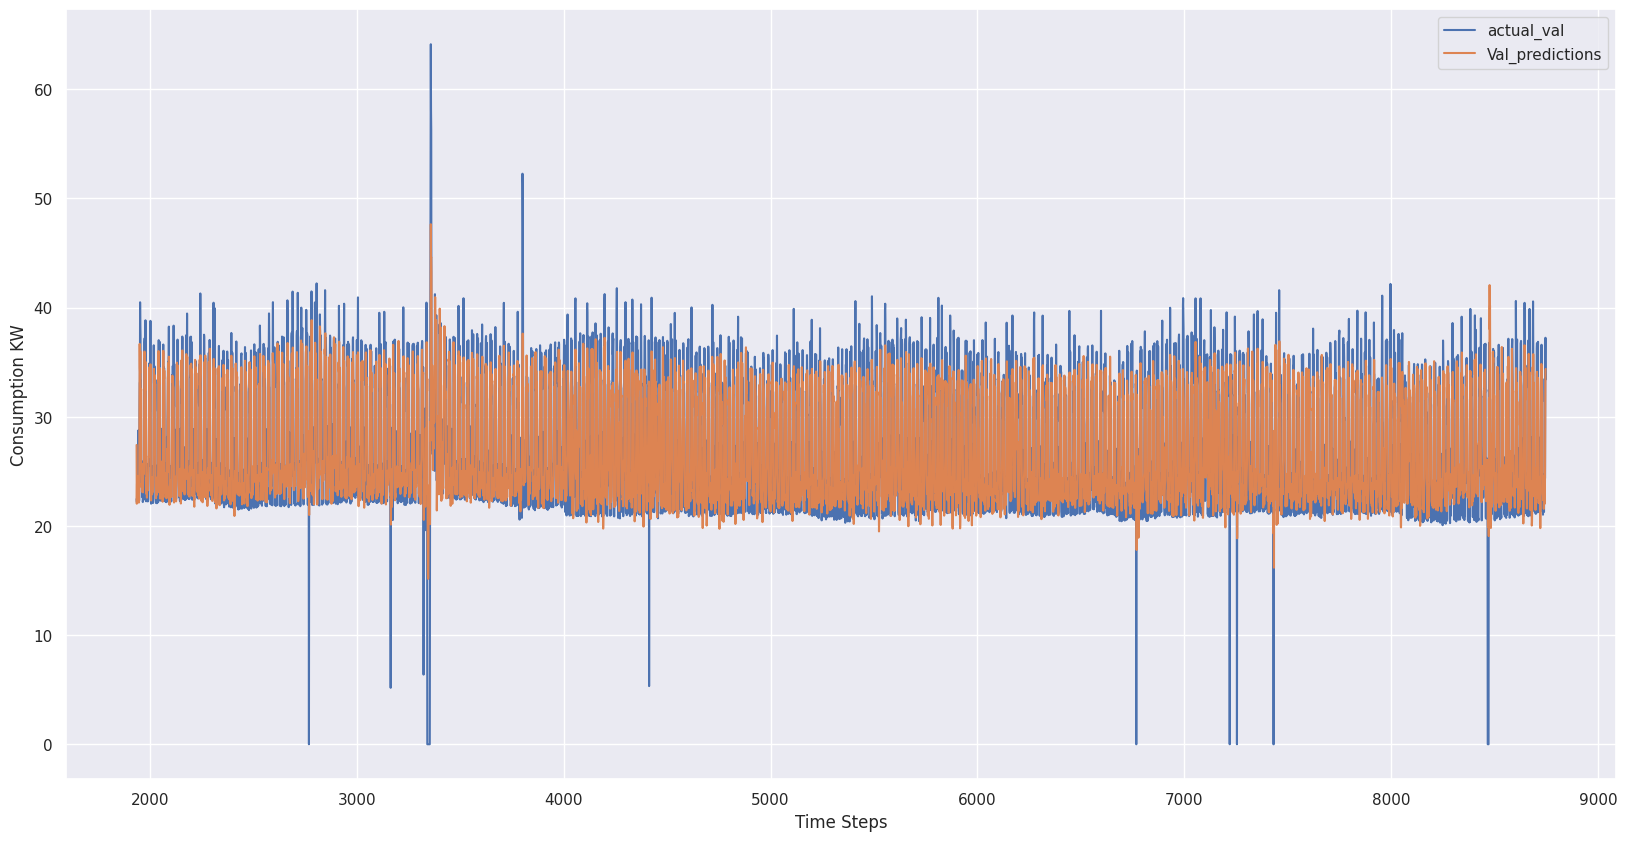

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:1936+actual_val.shape[0], :] = actual_val
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:1936+val_predictions.shape[0], :] = val_predictions
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption KW')

In [ ]:

# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

267/267 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step


,test Predictions,Actuals_test
0,[30.374755859375],[32.87]
1,[31.30893898010254],[33.16]
2,[33.06011199951172],[0.0]
3,[21.989513397216797],[36.51]
4,[27.953405380249023],[31.47]
...,...,...
8535,[28.542362213134766],[20.66]
8536,[22.201435089111328],[20.75]
8537,[23.072702407836914],[24.24]
8538,[24.10834312438965],[23.97]


Text(0, 0.5, 'Consumption KW')

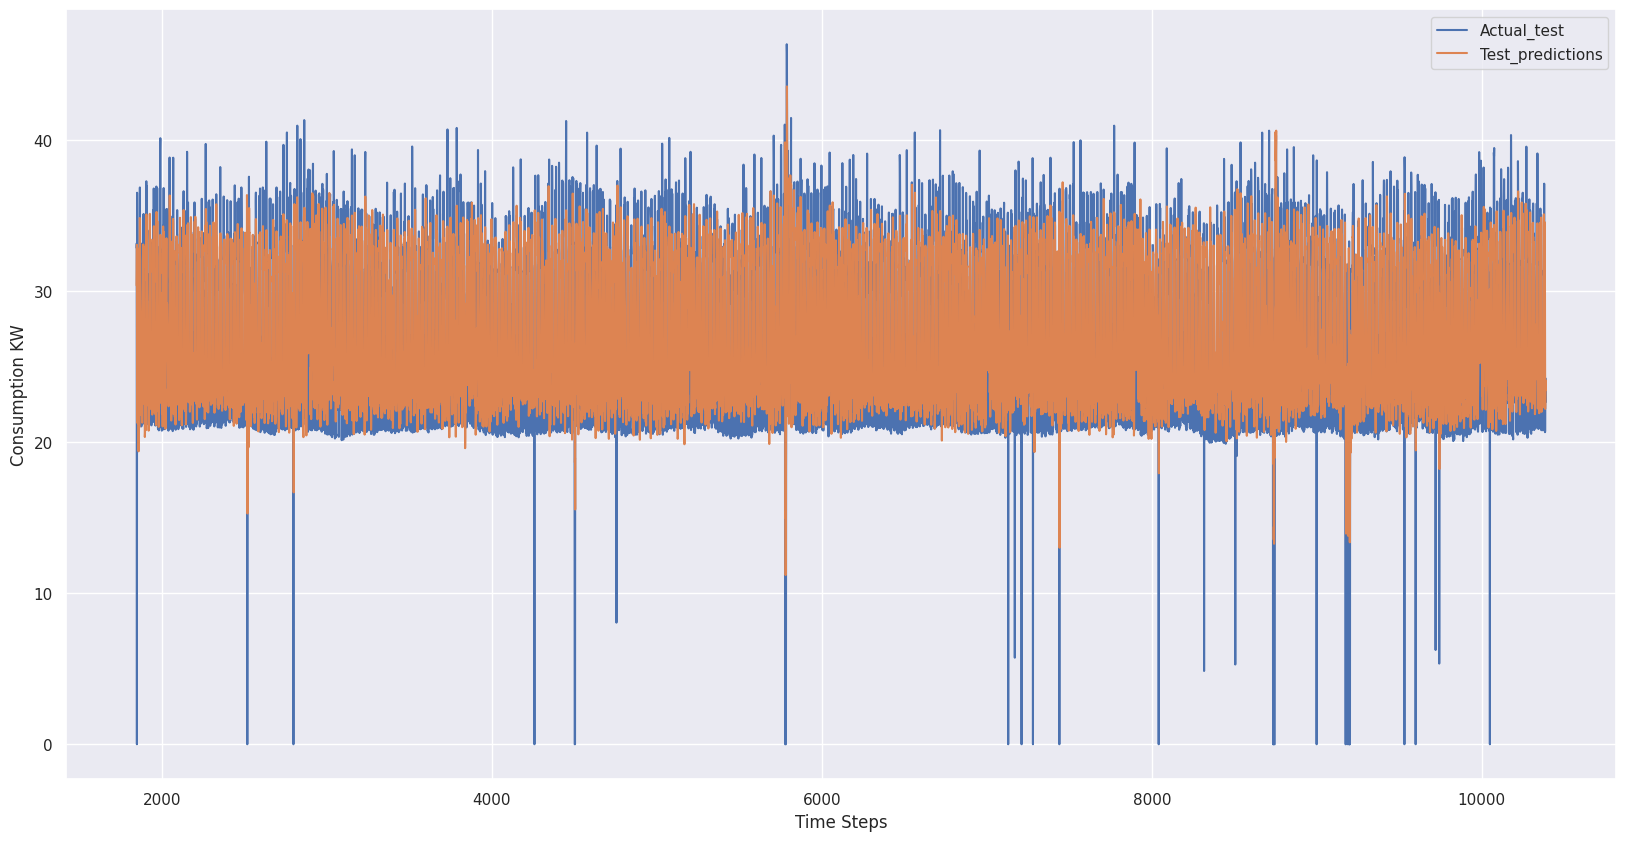

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:1848+actual_test.shape[0], :] = actual_test
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:1848+test_predictions.shape[0], :] = test_predictions

plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption KW')

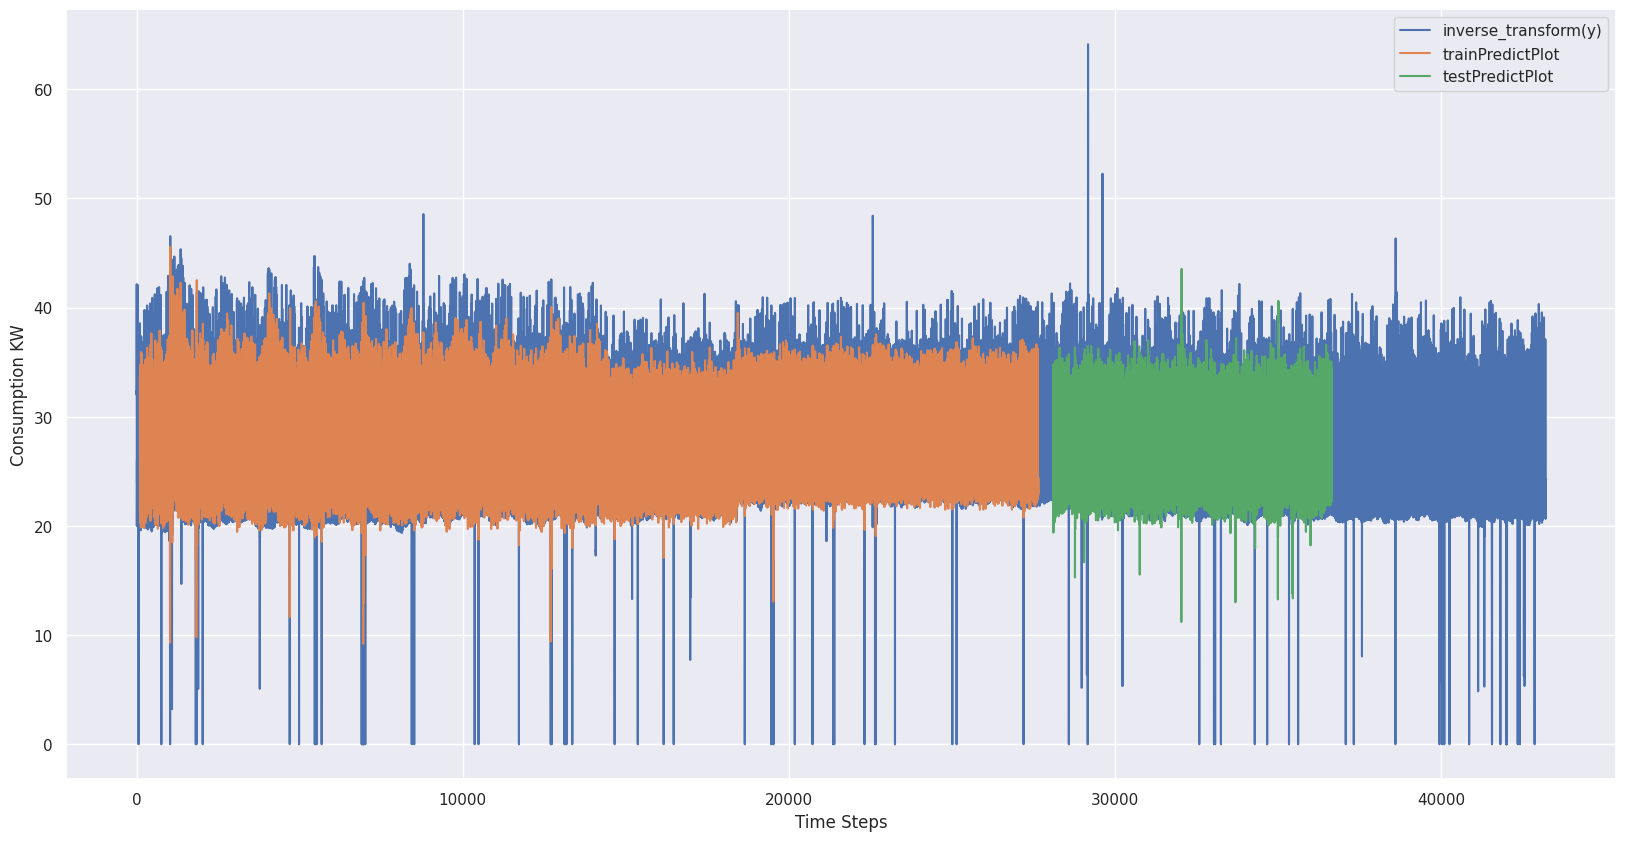

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(train_predict)+(look_back*2)+1+349+test_predict.shape[0], :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption KW')
plt.show()

Future forecasting

In [ ]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

8641
[0.51411196]
27648
(1, 8304)


In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):

    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 8303, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

0 day input [0.34991424 0.3670669  0.32714798 ... 0.37377203 0.35318884 0.32278185]
0 day output [[0.35019904]]
1 day input [0.3670669  0.32714798 0.48370497 ... 0.35318884 0.32278185 0.35019904]
1 day output [[0.37155867]]
2 day input [0.32714798 0.48370497 0.51910182 ... 0.32278185 0.35019904 0.37155867]
2 day output [[0.37523586]]
3 day input [0.48370497 0.51910182 0.4950881  ... 0.35019904 0.37155867 0.37523586]
3 day output [[0.36235517]]
4 day input [0.51910182 0.4950881  0.52190862 ... 0.37155867 0.37523586 0.36235517]
4 day output [[0.35284114]]
5 day input [0.4950881  0.52190862 0.51457976 ... 0.37523586 0.36235517 0.35284114]
5 day output [[0.35684818]]
6 day input [0.52190862 0.51457976 0.55138001 ... 0.36235517 0.35284114 0.35684818]
6 day output [[0.37216336]]
7 day input [0.51457976 0.55138001 0.5049119  ... 0.35284114 0.35684818 0.37216336]
7 day output [[0.40819216]]
8 day input [0.55138001 0.5049119  0.4946203  ... 0.35684818 0.37216336 0.40819216]
8 day output [[0.491

43201
[[22.45826468]
 [23.82805727]
 [24.06387542]
 [23.23783722]
 [22.62770223]
 [22.8846738 ]
 [23.86683598]
 [26.17736308]
 [31.50014571]
 [33.55598706]
 [33.34928065]
 [33.22243279]
 [32.91061294]
 [32.74375171]
 [33.54141589]
 [32.86041276]
 [25.47001182]
 [22.59243253]
 [22.83805525]
 [23.14118285]
 [23.21075328]
 [23.21426802]
 [23.17655959]
 [23.13866769]
 [23.18707896]
 [23.31896863]
 [23.43662734]
 [23.54238868]
 [23.89403077]
 [25.90287515]]


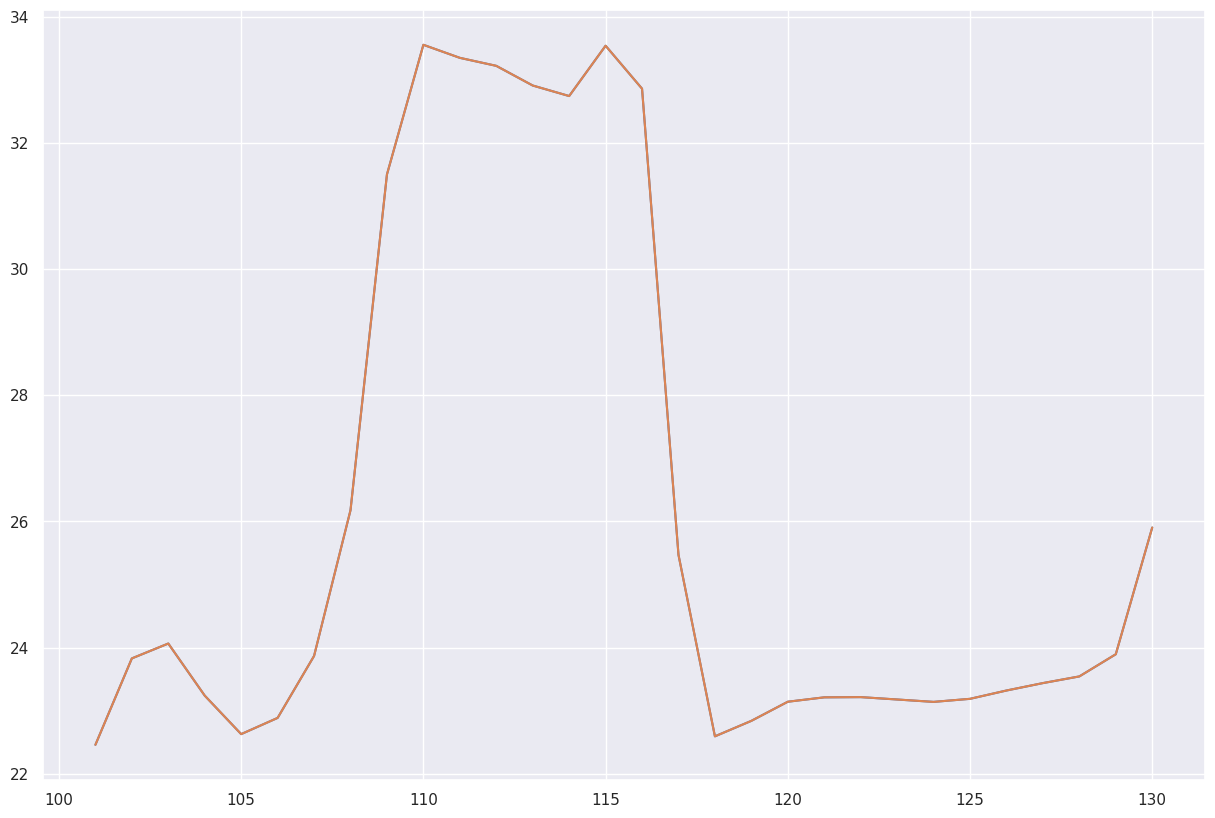

In [ ]:

print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_pred, scaler.inverse_transform(lst_output).squeeze())
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))


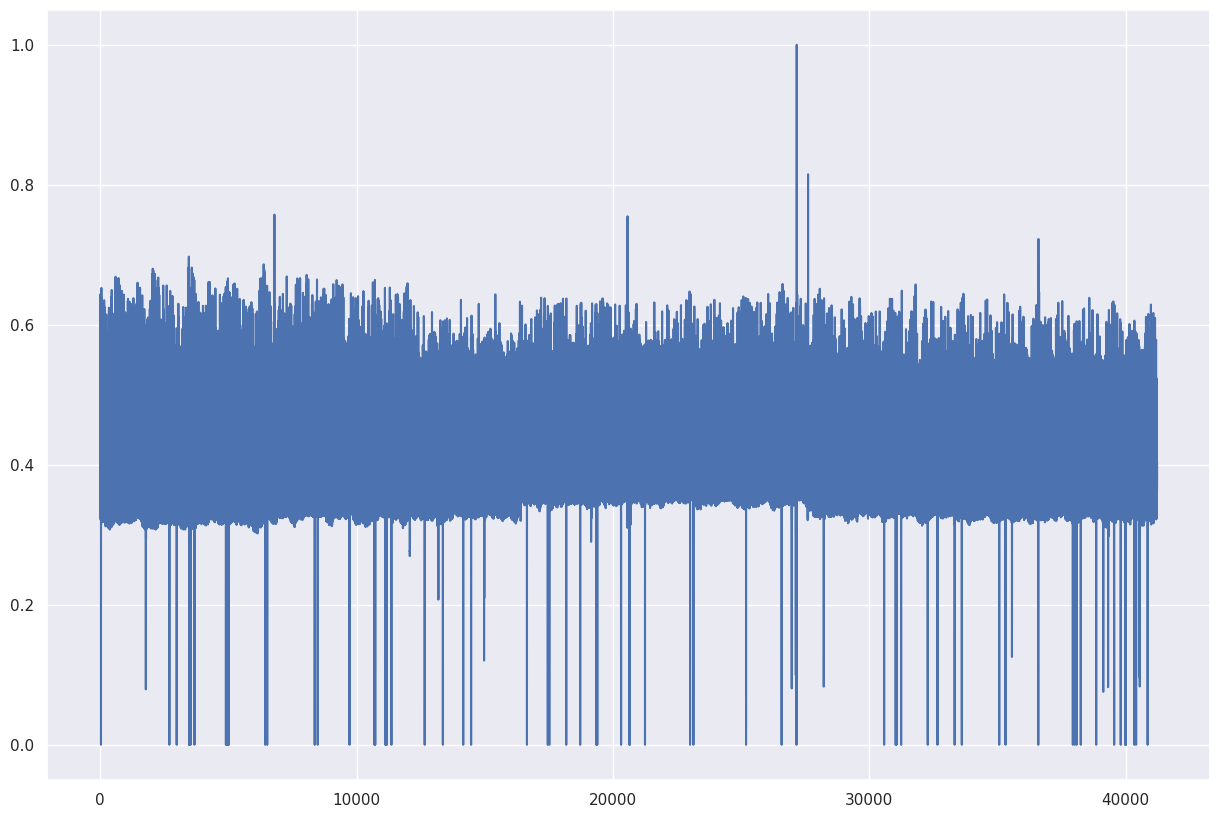

In [ ]:

df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])
